In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def generate_data(sigma2, N, true_r):
    w = np.sqrt(sigma2) * np.random.randn(N)  # Generate noise
    n = np.arange(1, N+1)  # Indices
    x = true_r**n + w  # Observations
    return x, n

def estimate_r(x, n, initial_guess, tol=1e-6, max_iter=100):
    r = initial_guess
    for iter in range(max_iter):
        grad = np.sum((x - r**n) * (n * r**(n-1)))  # Gradient
        hessian = np.sum((n * (n-1) * r**(n-2) * (x - r**n)) - (n**2 * r**(2*n-2)))  # Hessian
        r_new = r - grad / hessian
        if np.abs(r_new - r) < tol:
            break

        r = r_new  # Update r
    
    return r

def plot_convergence(initial_guesses, final_estimates, true_r):
    plt.style.use('dark_background')
    plt.figure(figsize=(10, 6))
    plt.plot(initial_guesses, final_estimates, 'o-', linewidth=2)
    plt.axhline(true_r, color='r', linestyle='--', linewidth=1.5, label='True r')  
    plt.xlabel('Initial Guess for r', fontsize=14, color='white')
    plt.ylabel('Estimated r', fontsize=14, color='white')
    plt.title('Convergence of r Estimates from Different Initial Guesses', fontsize=16, color='white')
    plt.grid(True, linestyle='--', color='gray')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

def plot_likelihood(x, n, r_values):
    likelihood = np.zeros_like(r_values)
    for j, r in enumerate(r_values):
        likelihood[j] = np.sum((x - r**n)**2) 
    plt.style.use('dark_background')  
    plt.figure(figsize=(10, 6))
    plt.plot(r_values, likelihood, 'b-', linewidth=2)
    max_idx = np.argmax(likelihood)  
    plt.plot(r_values[max_idx], likelihood[max_idx], 'ro', markersize=8, linewidth=2)  
    plt.xlabel('r', fontsize=14, color='white')
    plt.ylabel('Log-Likelihood $\mathcal{L}(r)$', fontsize=14, color='white')
    plt.title('Log-Likelihood Function', fontsize=16, color='white')
    plt.grid(True, linestyle='--', color='gray')
    plt.legend(['Log-Likelihood', 'Maximum Likelihood'], loc='best')
    plt.tight_layout()
    plt.show()


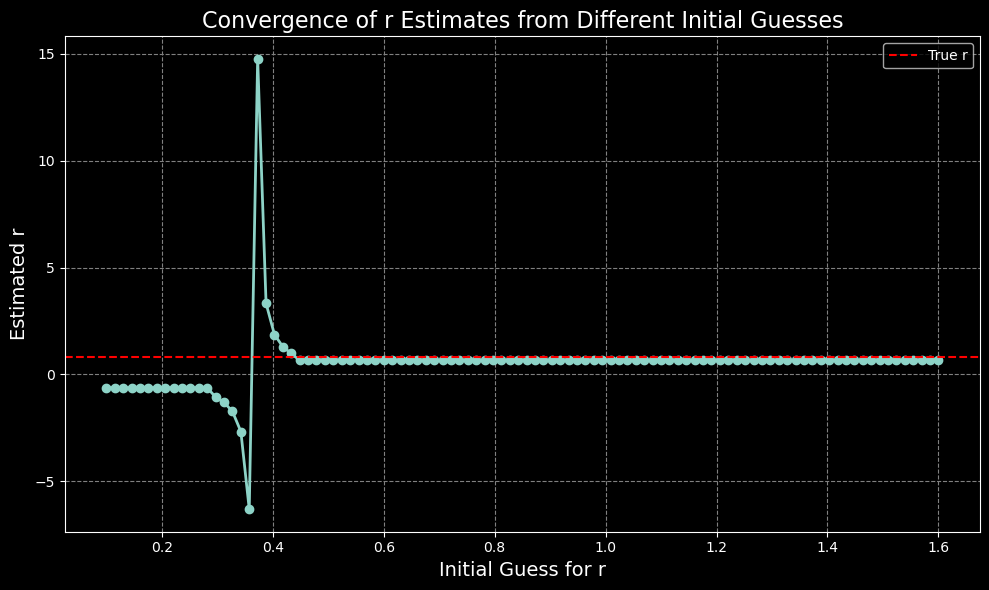

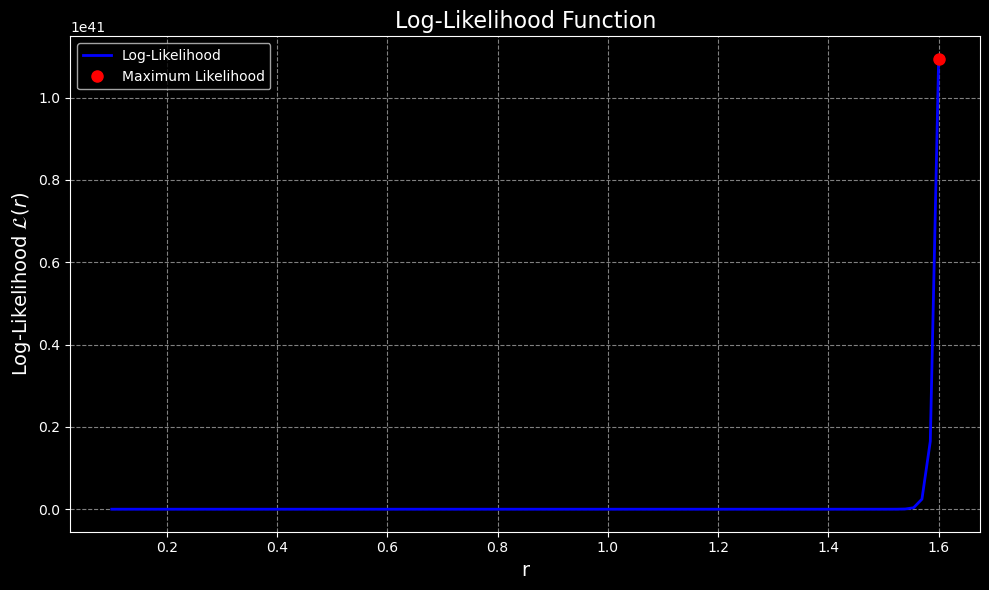

In [3]:

def main():

    np.random.seed(4)
    sigma2 = 1  
    N = 100    
    true_r = 0.8 
    
    x, n = generate_data(sigma2, N, true_r)
    
    initial_guesses = np.linspace(0.1, 1.6, 100) 
    
    final_estimates = np.zeros_like(initial_guesses) 
    
    for i, r_init in enumerate(initial_guesses):
        final_estimates[i] = estimate_r(x, n, r_init)
    
    plot_convergence(initial_guesses, final_estimates, true_r)
    
    r_values = np.linspace(0.1, 1.6, 100)
    plot_likelihood(x, n, r_values)

if __name__ == "__main__":
    main()
